# Exploring Student Data
Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?

In this project, you’ll explore and summarize some student data in order to answer these questions.
<br>
#### Data citation:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository __[\[http://archive.ics.uci.edu/ml\]](http://archive.ics.uci.edu/ml)__ Irvine, CA: University of California, School of Information and Computer Science. 
__[http://archive.ics.uci.edu/ml/datasets/Student+Performance](http://archive.ics.uci.edu/ml/datasets/Student+Performance)__

Paulo Cortez, University of Minho, Guimarães, Portugal, __[http://www3.dsi.uminho.pt/pcortez](http://www3.dsi.uminho.pt/pcortez)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import data. Load csv file
students = pd.read_csv('students.csv')


## Initial exploration
The provided dataframe (saved as `students`) includes the following variables/features:

- `address`: the location of the student’s home (`'U'` for urban and `'R'` for rural)
- `absences`: the number of times the student was absent during the school year
- `Mjob`: the student’s mother’s job industry
- `Fjob`: the student’s father’s job industry
- `math_grade`: the student’s final grade in math, ranging from 0 to 20


In [3]:
# inspect first 5 rows of data frame
students.head()

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


In [4]:
# inspect variables datatypes
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     395 non-null    object
 1   absences    395 non-null    int64 
 2   Mjob        395 non-null    object
 3   Fjob        395 non-null    object
 4   math_grade  395 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.6+ KB


In [5]:
# Summary Statistics for all five features
students.describe(include='all')

,address,absences,Mjob,Fjob,math_grade
count,395,395.000000,395,395,395.000000
unique,2,NaN,5,5,NaN
top,U,NaN,other,other,NaN
freq,307,NaN,141,217,NaN
mean,NaN,5.708861,NaN,NaN,10.415190
std,NaN,8.003096,NaN,NaN,4.581443
min,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,8.000000,NaN,NaN,14.000000


Q:  Do more students live in urban or rural locations?
A: More students live in urban locations

## Summarize a typical student grade


In [6]:
# calculate the mean value of math_grade
print('mean math grade:', students.math_grade.mean())

mean math grade: 10.415189873417722


In [7]:
# calculate the median value of math grade
print('median math grade:', students.math_grade.median())

median math grade: 11.0


In [8]:
# calculate the mode of math grade
print('mode of math grade:', students.math_grade.mode()[0])

mode of math grade: 10


In [9]:
# calculate the range of math grade
math_range = students.math_grade.max() - students.math_grade.min()
print('range of math grades:', math_range)

range of math grades: 20


In [10]:
# calculate the standard deviation of math grade
print('SD of math grades:', students.math_grade.std())

SD of math grades: 4.5814426109978434


The standard deviation is about 4.6, while the average grade is about 10.4. This means that about two thirds of students are earning a grade between 5.8 (calculated as 10.4 - 4.6) and 15 (calculated as 10.4 + 4.6).

In [11]:
# calculate the mean absolute deviation of math grade
# print('MAD of math grades:', students.math_grade.mad())
math_mad = abs(students.math_grade - students.math_grade.mean()).mean()
print('MAD of math grades:', math_mad)

MAD of math grades: 3.4289889440794745


## Visualize the distribution of student grades

/Users/matth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


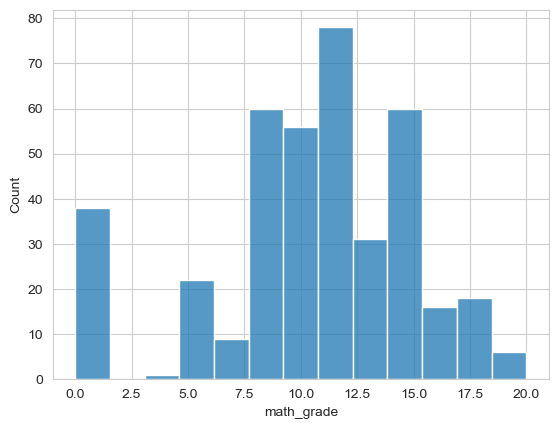

<Figure size 640x480 with 0 Axes>

In [13]:
# visualize the distribution on histogram
sns.histplot(x='math_grade', data=students)
plt.show()
plt.clf()

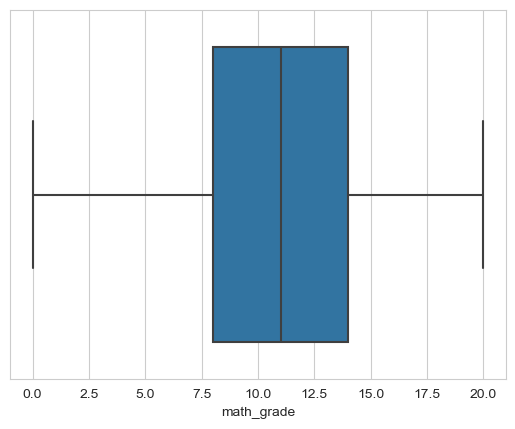

<Figure size 640x480 with 0 Axes>

In [14]:
# visualize the distribution by box plot
sns.boxplot(students, x='math_grade')
plt.show()
plt.clf()

## Summarize mothers' jobs

In [19]:
# Calculate number of students with mothers in each job category
students.Mjob.value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

In [22]:
# Calculate proportion of students with mothers in each job category
students.Mjob.value_counts(normalize=True)

Mjob
other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: proportion, dtype: float64

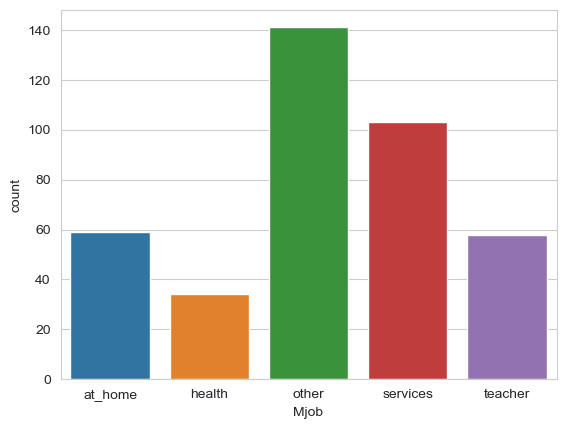

<Figure size 640x480 with 0 Axes>

In [23]:
# Summarize the Mjob column by printing the number of students who have mothers with each job type
sns.countplot(data=students, x='Mjob')
plt.show()
plt.clf()

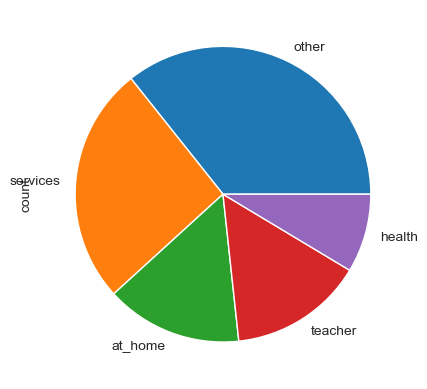

In [25]:
students.Mjob.value_counts().plot.pie()
plt.show()
plt.close()